# Trabajo Práctico - Transformada de Fourier
#### Forward Discrete Fourier Transform (DFT):
$$X_k=\sum_{n=0}^{N-1}x_n \cdot e^{-i2\pi kn/N}$$

#### Inverse Discrete Fourier Transform (IDFT):
$$x_n={1 \over N}\sum_{k=0}^{N-1}X_ke^{i2\pi kn/N}$$

La transformación desde $x_n \to X_k$ es un traducción desde el dominio de configuración (tiempo o espacio) al dominio de las frecuencia. 

## Ejercicio 1

1- Implementar algoritmo Discrete Fourier Transform (DFT) y comparar con la implementacion de NumPy o SciPy.

In [0]:
import numpy as np
def DFT(x):
    """Computo discrete Fourier Transform de un 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp( ( -2j * np.pi * k * n ) / N )
    return np.dot(M, x)

def IDFT(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp( ( 2j * np.pi * k * n ) )/N
    return np.dot(M, x)

In [7]:
x = np.random.random(1024)
#np.allclose(DFT(x), np.fft.fft(x))
np.allclose(IDFT(DFT(x)), np.fft.ifft(np.fft.fft(x)))
print(IDFT(DFT(x)))
print("")
print(np.fft.ifft(np.fft.fft(x)))
a=np.fft.ifft(np.fft.fft(x))
b=np.fft.fft(x)
c=x

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[0.58706624+0.00000000e+00j 0.58706624-2.70217862e-14j
 0.58706624-5.40435724e-14j ... 0.58706624-6.45933518e-11j
 0.58706624-7.78371658e-11j 0.58706624-6.07591098e-12j]

[0.58706624-8.50014503e-17j 0.00459544+1.34441069e-17j
 0.54625681-1.14491749e-16j ... 0.56438869-1.90819582e-17j
 0.82465814+2.25514052e-17j 0.61802029-5.11743425e-17j]


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


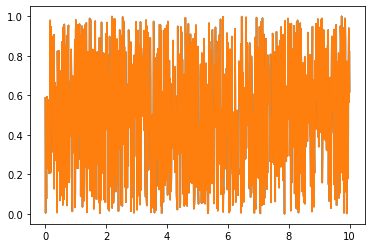

In [15]:
import numpy as np
from scipy.fftpack import fft, ifft, fftfreq
%matplotlib inline
import matplotlib.pyplot as plt
time = np.linspace(0,10,1024)
plt.plot(time,a)
#plt.plot(time,b)
plt.plot(time,c)